In [23]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [24]:
# Load the saved model
models_folder = "models"
model_path = os.path.join(models_folder, "model_balanced_decision_tree.pkl")

with open(model_path, "rb") as model_file:
    balanced_decision_tree_model = pickle.load(model_file)

print(f"Model loaded successfully from {model_path}")

Model loaded successfully from models/model_balanced_decision_tree.pkl


In [25]:
# Load the new dataset
data_path = "hawaii_processed_data/sentinel_data_corrected_no_na.csv"
hawaii_data = pd.read_csv(data_path)

In [26]:
print(hawaii_data.columns)

Index(['latitude', 'longitude', 'B01_20m', 'B02_20m', 'B03_20m', 'B04_20m',
       'B05_20m', 'B06_20m', 'B07_20m', 'B08A_20m', 'B11_20m', 'B12_20m', 'PI',
       'NDWI', 'WRI', 'AWEI', 'MNDWI', 'SR', 'RNDVI', 'ARI', 'MARI',
       'CHL_RedEdge', 'REPI', 'EVI', 'EVI2', 'GNDVI', 'MCARI', 'MSI', 'NDMI',
       'NBR', 'NDSI', 'SAVI', 'OSI', 'PNDVI', 'NDVI', 'FDI'],
      dtype='object')


In [27]:
hawaii_data = hawaii_data.rename(columns={'B01_20m': 'B1'})
#hawaii_data = hawaii_data.rename(columns={'B08A_20m': 'B8A'})

In [28]:
# Ensure the dataset contains the required features
required_features = ['NDSI', 'MNDWI', 'NDWI', 'OSI', 'FDI', 'B1']
if not all(feature in hawaii_data.columns for feature in required_features):
    raise ValueError(f"The dataset is missing one or more required features: {required_features}")


In [29]:
new_features = hawaii_data[['NDSI', 'MNDWI', 'NDWI', 'OSI', 'FDI', "B1"]]

In [30]:
new_features

,NDSI,MNDWI,NDWI,OSI,FDI,B1
0,0.045398,0.060862,0.046706,1.491884,-11.547282,273
1,0.039158,0.045763,0.035235,1.718460,-116441.602285,252
2,0.033501,0.030480,0.024491,1.735781,-116424.940131,260
3,0.029340,0.019370,0.017728,1.740636,-116414.832029,272
4,0.018853,0.011306,0.008162,1.733379,21.560821,280
...,...,...,...,...,...,...
7401714,0.032219,0.037263,0.027223,1.747785,-116426.832029,1326
7401715,0.012518,0.033888,0.022640,1.836853,-34.777026,1386
7401716,0.021422,0.037424,0.006190,1.927341,-116364.190184,1444
7401717,0.022929,0.024495,0.002096,1.803728,-116359.291517,1327


In [31]:
predictions = balanced_decision_tree_model.predict(new_features)

In [32]:
hawaii_data['labels_new'] = predictions

In [33]:
hawaii_data

,latitude,longitude,B1,B02_20m,B03_20m,B04_20m,B05_20m,B06_20m,B07_20m,B08A_20m,...,MSI,NDMI,NBR,NDSI,SAVI,OSI,PNDVI,NDVI,FDI,labels_new
0,21.966985,-157.809977,273,1417,1255,859,1146,1135,1153,1143,...,1.002625,28.629533,0.014197,0.045398,0.212734,1.491884,13.510484,0.141858,-11.547282,water
1,21.966983,-157.809783,252,1403,1234,1177,1173,1152,1176,1150,...,0.992174,0.003928,0.010545,0.039158,42.218475,1.718460,12.665592,28.151697,-116441.602285,water
2,21.966982,-157.809590,260,1389,1234,1177,1190,1171,1193,1175,...,0.982128,0.009017,0.005993,0.033501,41.785760,1.735781,12.645427,27.863095,-116424.940131,water
3,21.966981,-157.809396,272,1415,1263,1200,1226,1212,1242,1219,...,0.977030,0.011618,0.001643,0.029340,0.011779,1.740636,12.336080,0.007854,-116414.832029,water
4,21.966979,-157.809202,280,1459,1297,1232,1259,1242,1282,1276,...,0.978840,0.010693,0.003145,0.018853,0.026311,1.733379,11.934650,0.017544,21.560821,plastic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7401714,21.602810,-156.974240,1326,1919,1698,1656,1711,1613,1687,1608,...,0.990050,0.005000,0.010050,0.032219,30.090979,1.747785,8.991571,20.063725,-116426.832029,water
7401715,21.602808,-156.974047,1386,1894,1739,1740,1835,1695,1722,1662,...,1.020457,19.506254,0.011256,0.012518,28.857311,1.836853,8.788202,19.241035,-34.777026,water
7401716,21.602806,-156.973854,1444,1858,1788,1793,1786,1767,1738,1766,...,0.969989,0.015234,0.031241,0.021422,27.605984,1.927341,8.586121,18.406575,-116364.190184,water
7401717,21.602803,-156.973661,1327,1824,1673,1617,1624,1639,1616,1666,...,0.959184,0.020833,0.022400,0.022929,0.022385,1.803728,9.157522,0.014925,-116359.291517,water


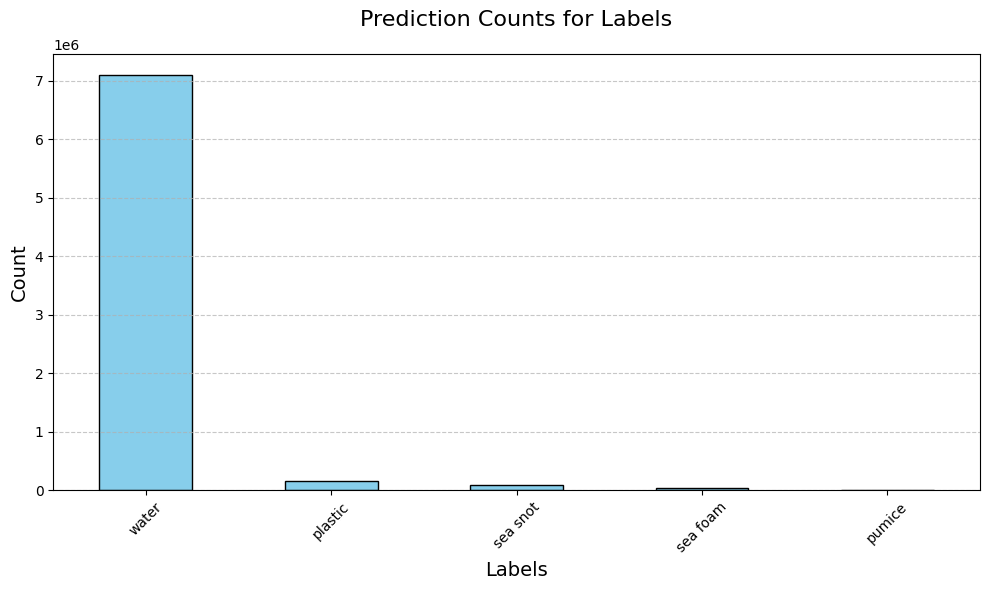

In [34]:
prediction_counts = hawaii_data['labels_new'].value_counts()
plt.figure(figsize=(10, 6))
prediction_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Prediction Counts for Labels', fontsize=16, pad=20)
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [35]:
prediction_counts

labels_new
water       7109526
plastic      161356
sea snot      90813
sea foam      39964
pumice           60
Name: count, dtype: int64

/var/folders/yg/p0mpnbs57bl5945wlhr72jg80000gn/T/ipykernel_87106/3324099947.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hawaii_data, x="labels_new", y="FDI", palette="tab10")


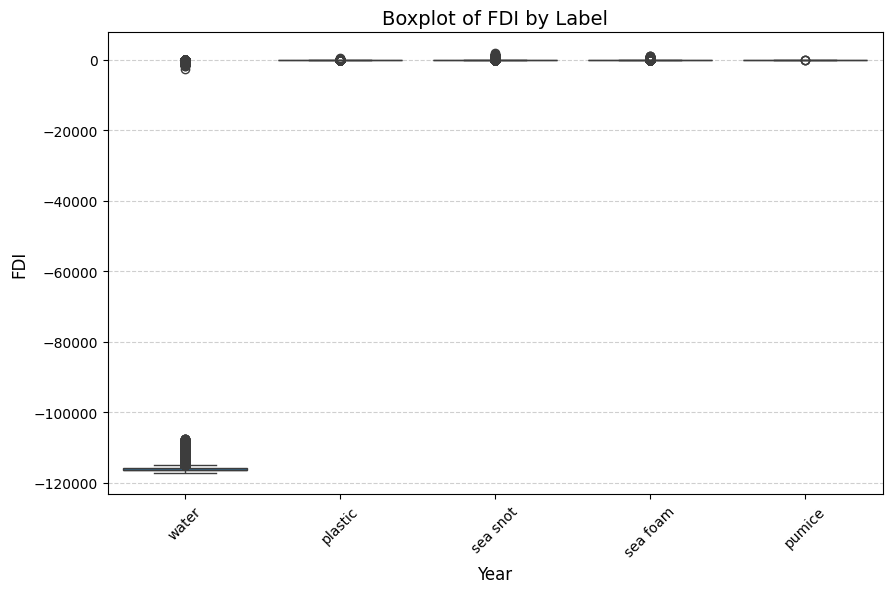

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=hawaii_data, x="labels_new", y="FDI", palette="tab10")

# Customize plot
plt.title("Boxplot of FDI by Label", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("FDI", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show plot
plt.show()

/var/folders/yg/p0mpnbs57bl5945wlhr72jg80000gn/T/ipykernel_87106/2495499423.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Labels")


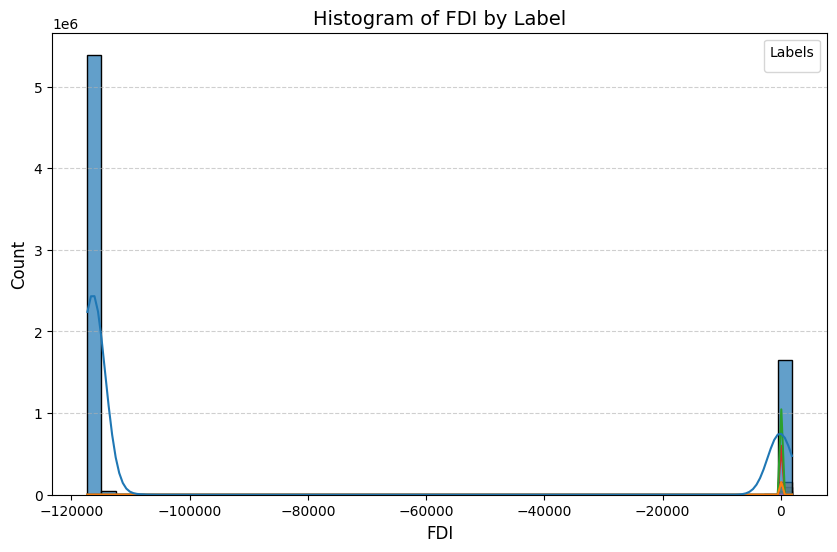

In [37]:


# Create histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=hawaii_data, x="FDI", hue="labels_new", kde=True, bins=50, palette="tab10", alpha=0.7)

# Customize plot
plt.title("Histogram of FDI by Label", fontsize=14)
plt.xlabel("FDI", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Labels")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show plot
plt.show()


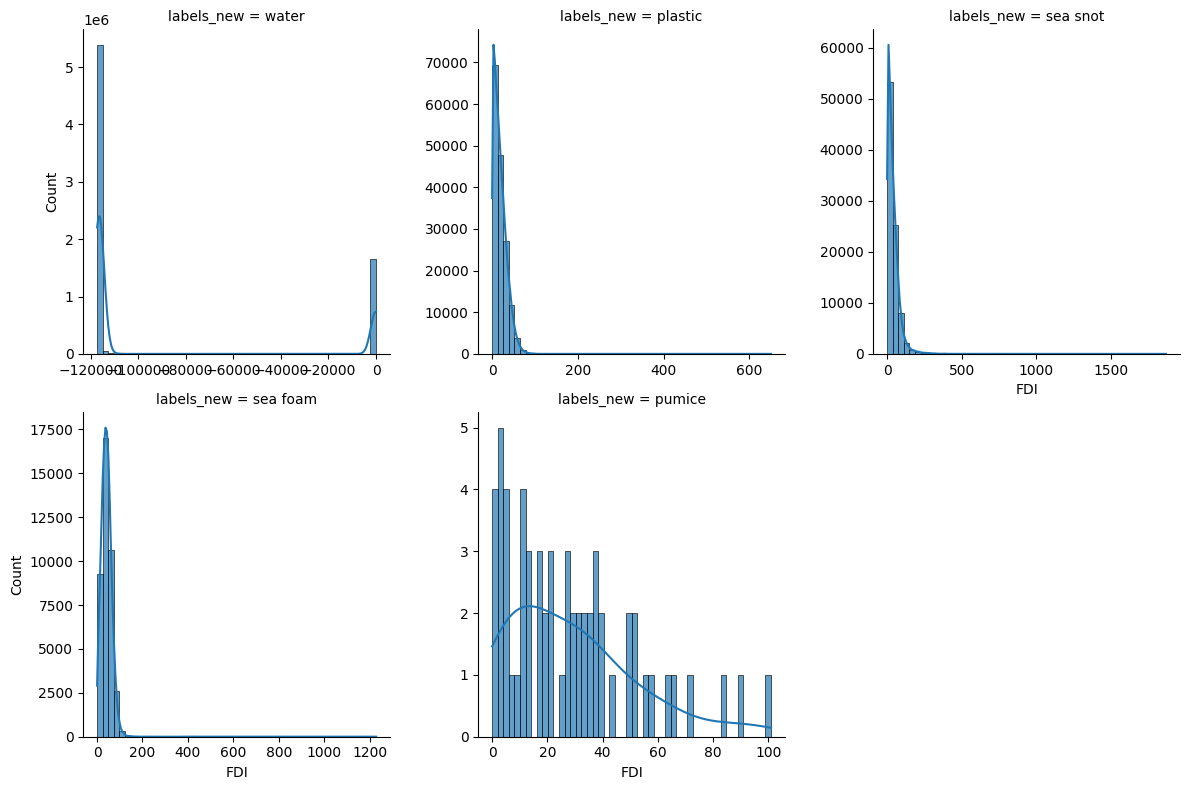

In [38]:

# Create a faceted histogram by labels_new
g = sns.FacetGrid(hawaii_data, col="labels_new", col_wrap=3, sharex=False, sharey=False, height=4)
g.map(sns.histplot, "FDI", bins=50, kde=True, alpha=0.7)

# Customize plots
#g.fig.suptitle("Histogram of FDI Faceted by Label", fontsize=14)
g.set_axis_labels("FDI", "Count")

# Show plot
plt.show()


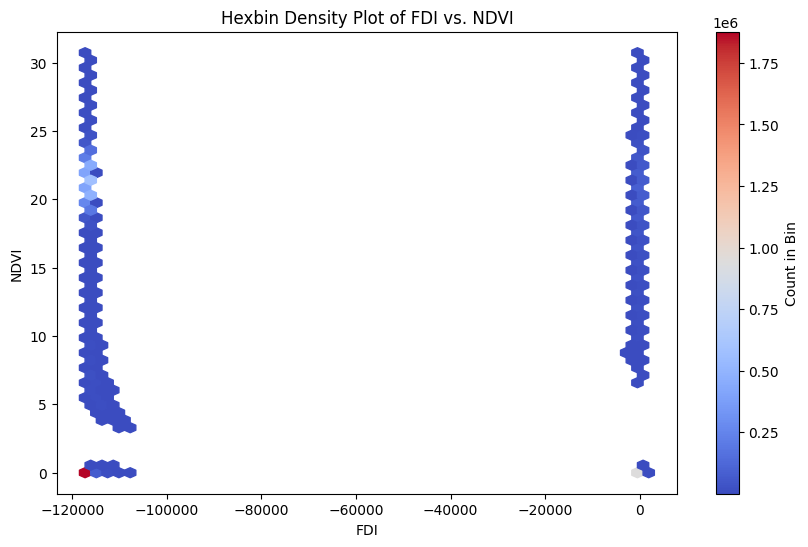

In [40]:
import numpy as np
plt.figure(figsize=(10, 6))
plt.hexbin(hawaii_data["FDI"], hawaii_data["NDVI"], gridsize=50, cmap="coolwarm", mincnt=1)
plt.colorbar(label="Count in Bin")
plt.xlabel("FDI")
plt.ylabel("NDVI")
plt.title("Hexbin Density Plot of FDI vs. NDVI")
plt.show()

/var/folders/yg/p0mpnbs57bl5945wlhr72jg80000gn/T/ipykernel_87106/3443458853.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=hawaii_data, x="labels_new", y="FDI", palette="tab10")


<Axes: xlabel='labels_new', ylabel='FDI'>

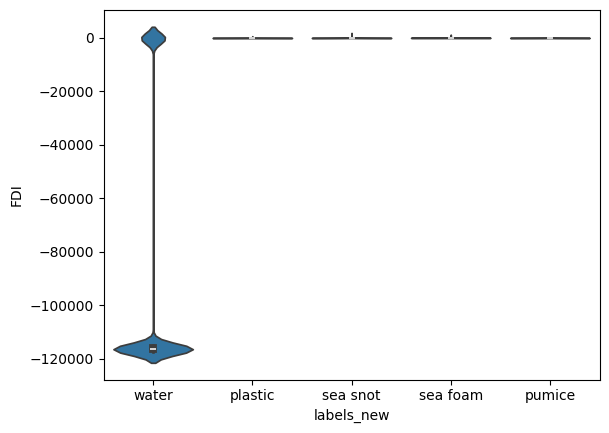

In [41]:
import seaborn as sns
sns.violinplot(data=hawaii_data, x="labels_new", y="FDI", palette="tab10")


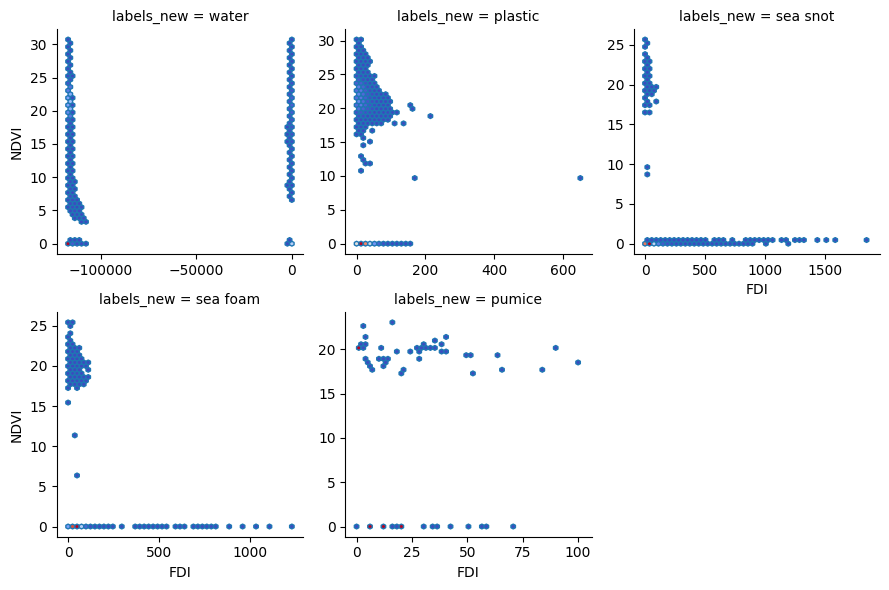

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create Faceted Hexbin plots by labels_new with free scales
g = sns.FacetGrid(hawaii_data, col="labels_new", col_wrap=3, sharex=False, sharey=False)

# Apply hexbin to each facet
g.map(plt.hexbin, "FDI", "NDVI", gridsize=50, cmap="coolwarm", mincnt=1)

# Customize plot
g.set_axis_labels("FDI", "NDVI")

plt.show()



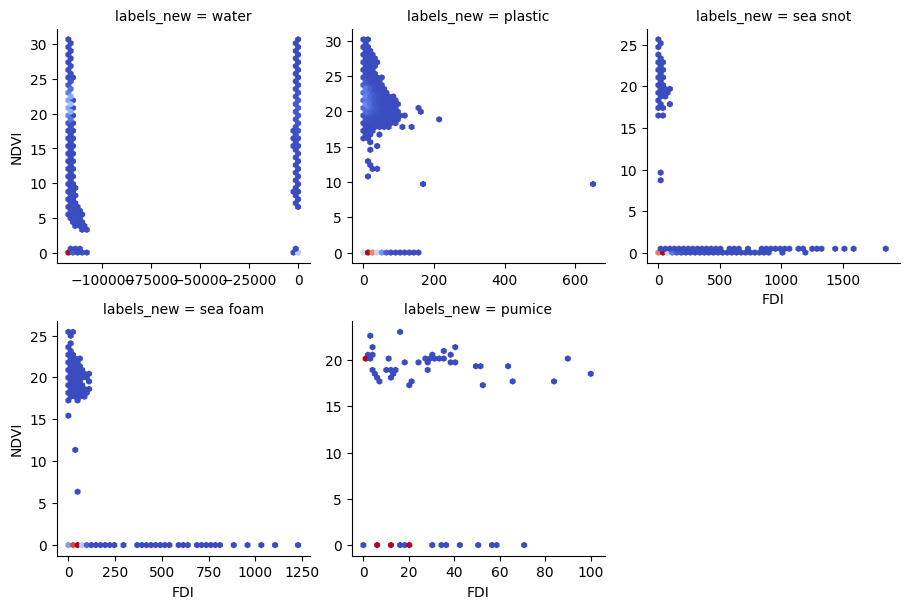

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create Faceted Hexbin plots by labels_new with free scales and independent color scales
g = sns.FacetGrid(hawaii_data, col="labels_new", col_wrap=3, sharex=False, sharey=False)

# Map hexbin with individual color scaling
g.map_dataframe(lambda data, color: plt.hexbin(data["FDI"], data["NDVI"], gridsize=50, cmap="coolwarm", mincnt=1))

# Customize plot
g.set_axis_labels("FDI", "NDVI")

plt.show()
